In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [5]:
train_data.isnull().any()

id               False
bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
type             False
dtype: bool

In [6]:
test_data.isnull().any()

id               False
bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
dtype: bool

In [7]:
test_ids = test_data['id']
train_data.drop(['id', 'color'], axis=1, inplace=True)
test_data.drop(['id', 'color'], axis=1, inplace=True)

In [8]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [9]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul,type_Ghost,type_Ghoul,type_Goblin
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392,0.315364,0.347709,0.336927
std,0.132833,0.146358,0.169902,0.176129,0.465288,0.476886,0.473298
min,0.061032,0.095687,0.134600,0.009402,0.000000,0.000000,0.000000
25%,0.340006,0.414812,0.407428,0.348002,0.000000,0.000000,0.000000
50%,0.434891,0.501552,0.538642,0.466372,0.000000,0.000000,0.000000
75%,0.517223,0.603977,0.647244,0.600610,1.000000,1.000000,1.000000
max,0.817001,0.932466,1.000000,0.935721,1.000000,1.000000,1.000000


In [10]:
test_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000
mean,0.425474,0.503637,0.517288,0.464096
std,0.136079,0.158552,0.171727,0.179659
min,0.000000,0.000000,0.000000,0.000000
25%,0.329383,0.393987,0.388189,0.338964
50%,0.421989,0.510065,0.520220,0.461294
75%,0.519024,0.605957,0.644824,0.584448
max,1.000000,1.000000,0.999841,1.000000


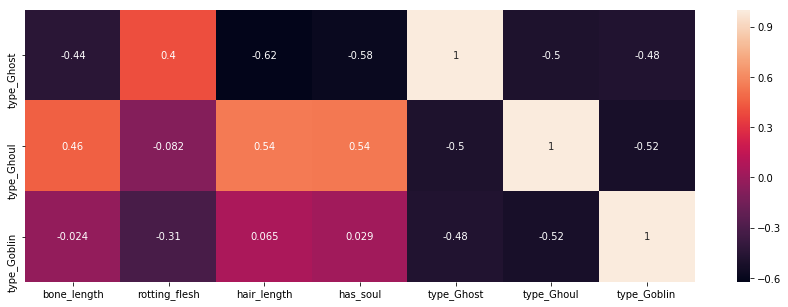

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr()[-3:], annot=True)

In [12]:
X = train_data.iloc[:, :-3]
X.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
3,0.776652,0.508723,0.636766,0.884464
4,0.566117,0.875862,0.418594,0.636438


In [13]:
y = train_data.iloc[:, -3:]
y.head()

,type_Ghost,type_Ghoul,type_Goblin
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0


In [14]:
y.shape

(371, 3)

In [15]:
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1], ), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X,
              y,
              32,
              120,
              callbacks=[EarlyStopping(patience=10, monitor='val_loss')],
              validation_split=0.25)



Train on 278 samples, validate on 93 samples
Epoch 1/120
278/278 [==============================] - 0s 1ms/step - loss: 0.6400 - acc: 0.6667 - val_loss: 0.6357 - val_acc: 0.6667
Epoch 2/120
278/278 [==============================] - 0s 92us/step - loss: 0.6316 - acc: 0.6667 - val_loss: 0.6233 - val_acc: 0.6667
Epoch 3/120
278/278 [==============================] - 0s 68us/step - loss: 0.6268 - acc: 0.6667 - val_loss: 0.6147 - val_acc: 0.6667
Epoch 4/120
278/278 [==============================] - 0s 83us/step - loss: 0.6193 - acc: 0.6667 - val_loss: 0.6064 - val_acc: 0.6667
Epoch 5/120
278/278 [==============================] - 0s 79us/step - loss: 0.6091 - acc: 0.6691 - val_loss: 0.5916 - val_acc: 0.6667
Epoch 6/120
278/278 [==============================] - ETA: 0s - loss: 0.5995 - acc: 0.666 - 0s 79us/step - loss: 0.5960 - acc: 0.6775 - val_loss: 0.5738 - val_acc: 0.6703
Epoch 7/120
278/278 [==============================] - 0s 76us/step - loss: 0.5744 - acc: 0.6847 - val_loss: 0.556

278/278 [==============================] - 0s 72us/step - loss: 0.3514 - acc: 0.8297 - val_loss: 0.4129 - val_acc: 0.7670
Epoch 62/120
278/278 [==============================] - 0s 79us/step - loss: 0.3362 - acc: 0.8261 - val_loss: 0.4097 - val_acc: 0.7670
Epoch 63/120
278/278 [==============================] - 0s 79us/step - loss: 0.3410 - acc: 0.8249 - val_loss: 0.4101 - val_acc: 0.7706
Epoch 64/120
278/278 [==============================] - 0s 90us/step - loss: 0.3452 - acc: 0.8249 - val_loss: 0.4153 - val_acc: 0.7885
Epoch 65/120
278/278 [==============================] - 0s 79us/step - loss: 0.3529 - acc: 0.8309 - val_loss: 0.4162 - val_acc: 0.7706
Epoch 66/120
278/278 [==============================] - 0s 76us/step - loss: 0.3596 - acc: 0.8225 - val_loss: 0.4053 - val_acc: 0.7778
Epoch 67/120
278/278 [==============================] - 0s 83us/step - loss: 0.3431 - acc: 0.8345 - val_loss: 0.4069 - val_acc: 0.7885
Epoch 68/120
278/278 [==============================] - 0s 86us/step

In [23]:
y_prob = model.predict(test_data.values)
y_classes = y_prob.argmax(axis=-1)
pred_classes = []
for item in y_classes:
    if item == 0:
        pred_classes.append('Ghost')
    if item == 1:
        pred_classes.append('Ghoul')
    if item == 2:
        pred_classes.append('Goblin')

529

In [31]:
d = {'id': test_ids.values, 'type': pred_classes}
submission = pd.DataFrame(data=d)
submission.set_index('id', inplace=True)
submission.to_csv('submission.csv', sep=',')
submission.head()

,type
id,
3,Ghoul
6,Goblin
9,Ghoul
10,Goblin
13,Ghost
